In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas==1.3.3 xgboost imblearn

In [ ]:
# from google.colab import files
import pickle
# import io
# uploaded = files.upload()

with open('/content/drive/MyDrive/CS421_Assignment_Data/x_train.pickle', "rb") as f:
    X_train = pickle.load(f)
with open('/content/drive/MyDrive/CS421_Assignment_Data/x_test.pickle', "rb") as f:
    X_test = pickle.load(f)
with open('/content/drive/MyDrive/CS421_Assignment_Data/y_train.pickle', "rb") as f:
    y_train = pickle.load(f)
with open('/content/drive/MyDrive/CS421_Assignment_Data/y_test.pickle', "rb") as f:
    y_test = pickle.load(f)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# def warn(*args, **kwargs): pass
# warnings.warn = warn
# param_grid = {
#     'learning_rate': [.01, .02, .05, .08, .1],
#     'n_estimators': range(150, 200, 5),
#     'max_depth': range(2, 10, 1),
# }


# model = xgb.XGBClassifier(objective='binary:logistic', tree_method='gpu_hist', seed=7,\
#                             use_label_encoder=False, verbosity=1)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold)
# cv_score = grid_search.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

In [ ]:
import numpy as np
def warn(*args, **kwargs): pass
warnings.warn = warn

def run_rando_search():
  param_grid = {
      'learning_rate': [rate for rate in np.linspace(.01, .1, num=10)],
      'n_estimators': [int(est) for est in np.linspace(150, 200, num=15)],
      'max_depth': range(2, 7),
  }


  model = xgb.XGBClassifier(objective='binary:logistic', seed=7,\
                              use_label_encoder=False, verbosity=1,\
                              tree_method='gpu_hist', gpu_id=0)
  kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
  rando_search = RandomizedSearchCV(model, param_grid, scoring='roc_auc', cv=kfold)
  cv_score = rando_search.fit(X_train, y_train)
  print(f"cv best score: {cv_score.best_score_}")
  print(f"best params:\n" 
        f"n_estimators: {cv_score.best_params_['n_estimators']}\n"
        f"max depth: {cv_score.best_params_['max_depth']}\n" 
        f"learning rate: {cv_score.best_params_['learning_rate']}\n")
  score = cv_score.best_estimator_.score(X_test, y_test)
  print(f"Test score: {score}\n\n")
 
  return cv_score

In [ ]:
import os
import pickle
if not os.path.exists('/content/drive/MyDrive/CS421_Assignment_Data/cv_scores.pickle'):
  cv_scores = []
  for round in range(1,11):
    print(f"Run {round}\n")
    cv_scores.append(run_rando_search())


  with open('/content/drive/MyDrive/CS421_Assignment_Data/cv_scores.pickle', 'wb') as f:
      pickle.dump(cv_scores, f, pickle.HIGHEST_PROTOCOL)
else:
  with open('/content/drive/MyDrive/CS421_Assignment_Data/cv_scores.pickle', 'rb') as f:
    cv_scores = pickle.load(f)

Run 1

cv best score: 0.9513589524384878
best params:
n_estimators: 200
max depth: 6
learning rate: 0.08

Test score: 0.8527426160337552


Run 2

cv best score: 0.9507280771549249
best params:
n_estimators: 150
max depth: 6
learning rate: 0.1

Test score: 0.8517580872011252


Run 3

cv best score: 0.9466962337474676
best params:
n_estimators: 185
max depth: 5
learning rate: 0.06000000000000001

Test score: 0.8535864978902954


Run 4

cv best score: 0.950230021897746
best params:
n_estimators: 160
max depth: 6
learning rate: 0.09000000000000001

Test score: 0.8535864978902954


Run 5

cv best score: 0.9503548139356963
best params:
n_estimators: 167
max depth: 6
learning rate: 0.09000000000000001

Test score: 0.8535864978902954


Run 6

cv best score: 0.9495756105225617
best params:
n_estimators: 178
max depth: 5
learning rate: 0.09000000000000001

Test score: 0.8523206751054853


Run 7

cv best score: 0.9497051548383967
best params:
n_estimators: 182
max depth: 5
learning rate: 0.090000

In [ ]:
from sklearn.metrics import classification_report

for idx, cv_score in enumerate(cv_scores,1):
  yhat = cv_score.best_estimator_.predict(X_test)
  print(f"CV {idx} classification report:\n{classification_report(y_test, yhat)}")

CV 1 classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6120
           1       0.29      0.04      0.07       990

    accuracy                           0.85      7110
   macro avg       0.58      0.51      0.50      7110
weighted avg       0.78      0.85      0.80      7110

CV 2 classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6120
           1       0.29      0.04      0.08       990

    accuracy                           0.85      7110
   macro avg       0.58      0.51      0.50      7110
weighted avg       0.78      0.85      0.80      7110

CV 3 classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6120
           1       0.32      0.04      0.08       990

    accuracy                           0.85      7110
   macro avg       0.59      0.51      0.50 

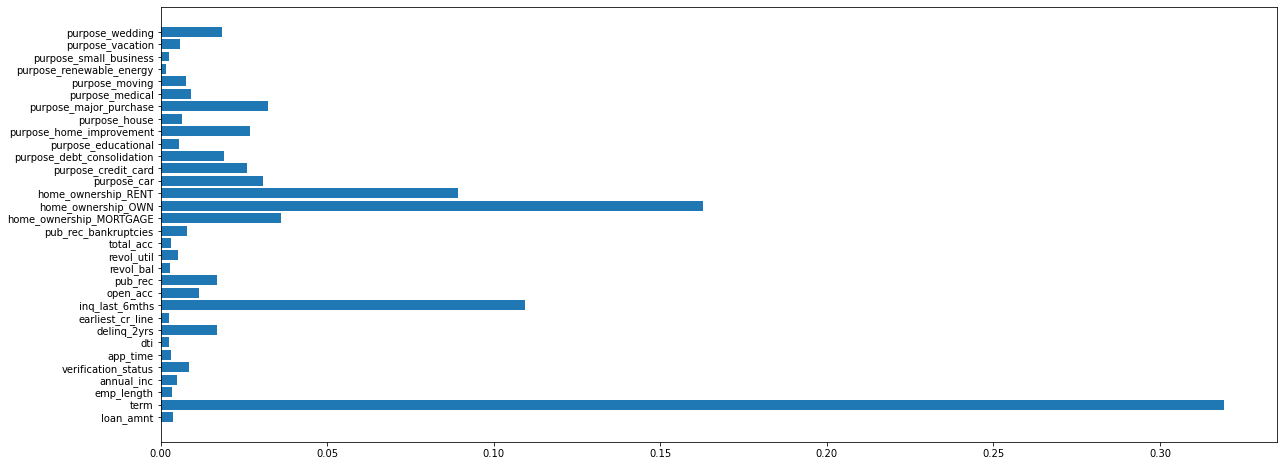

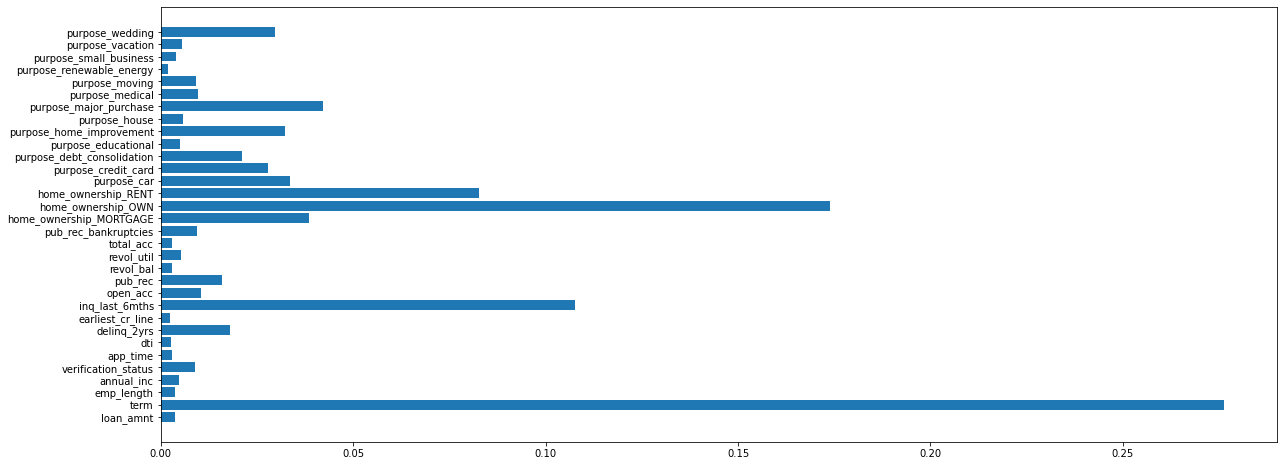

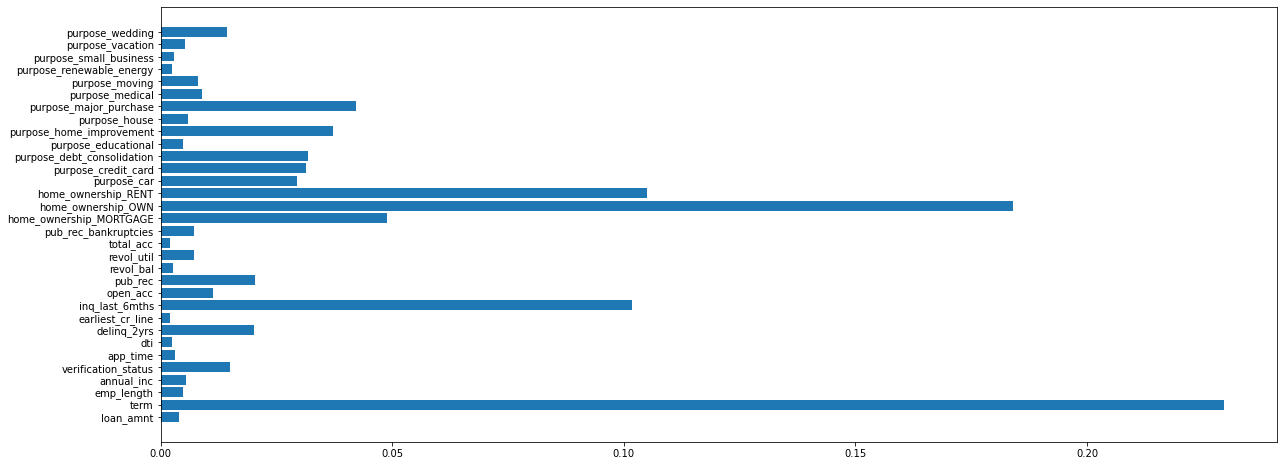

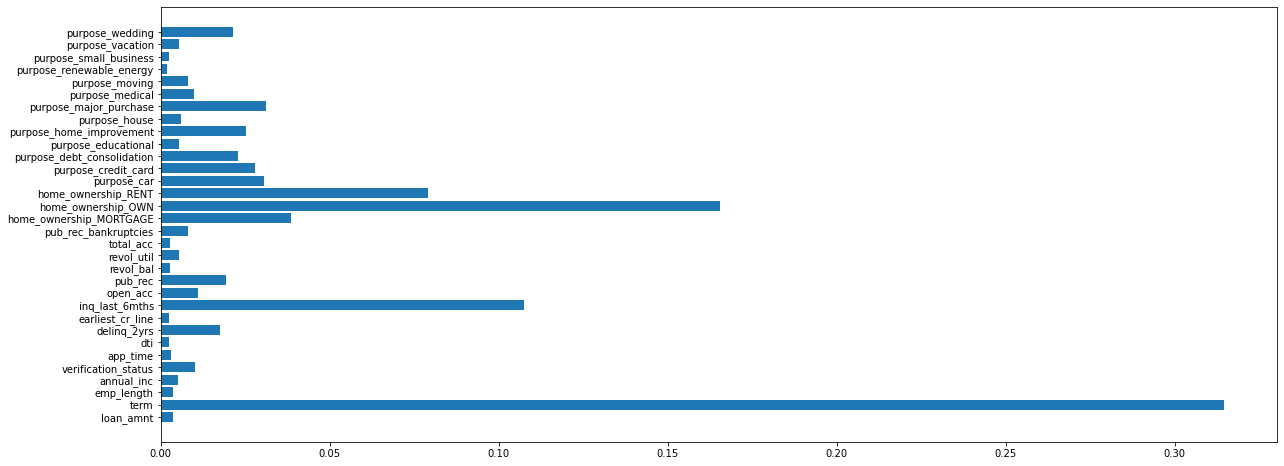

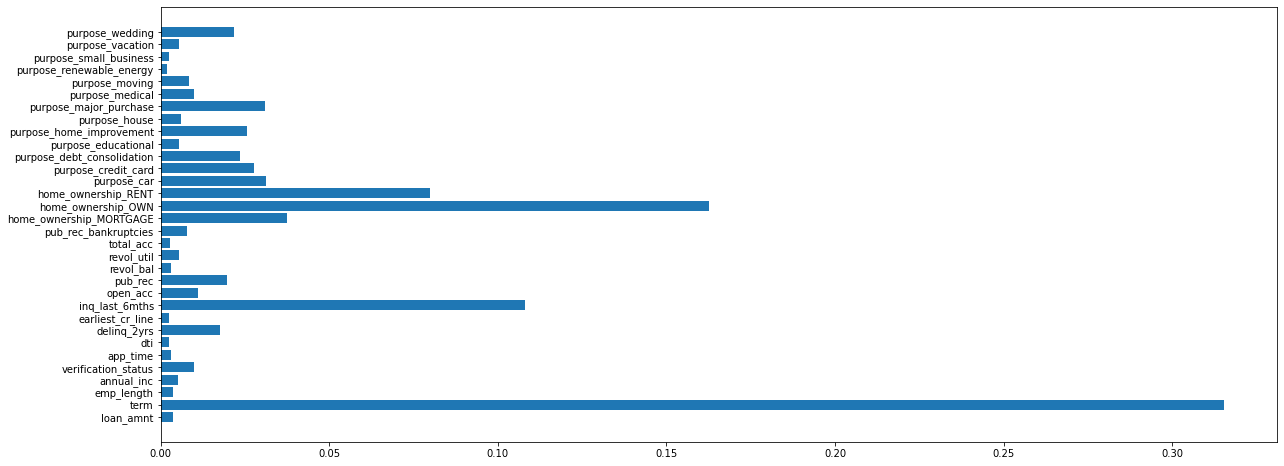

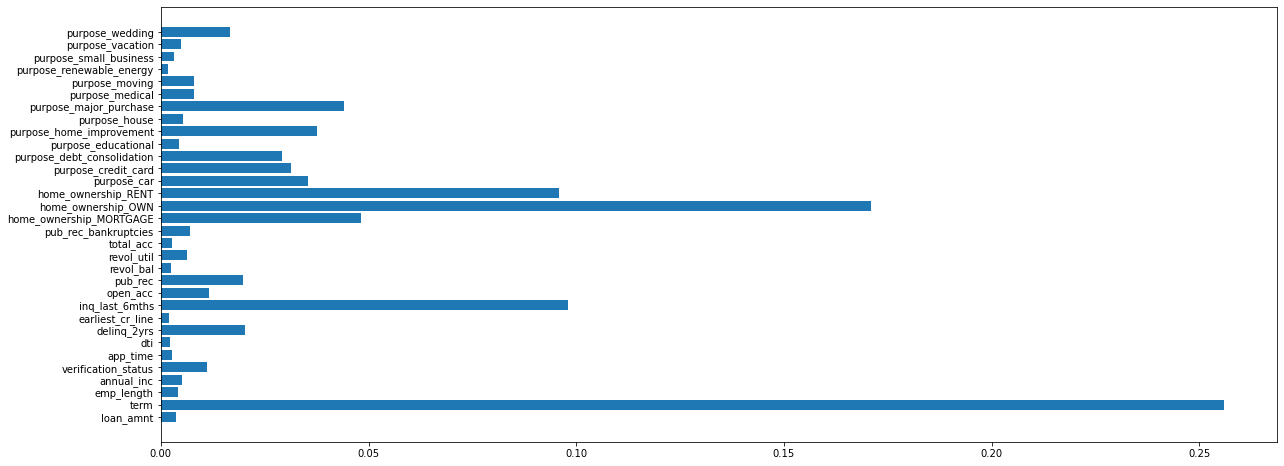

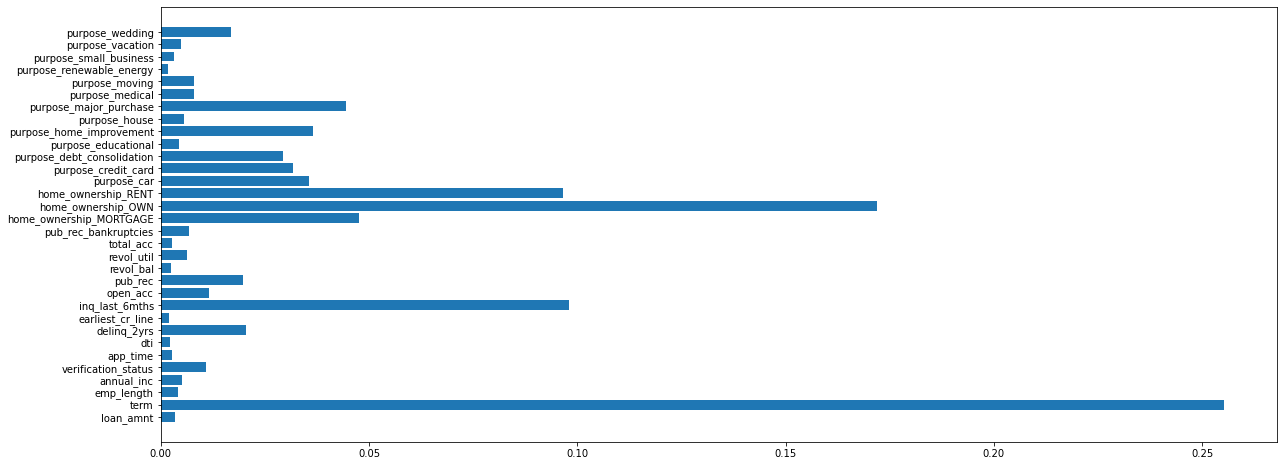

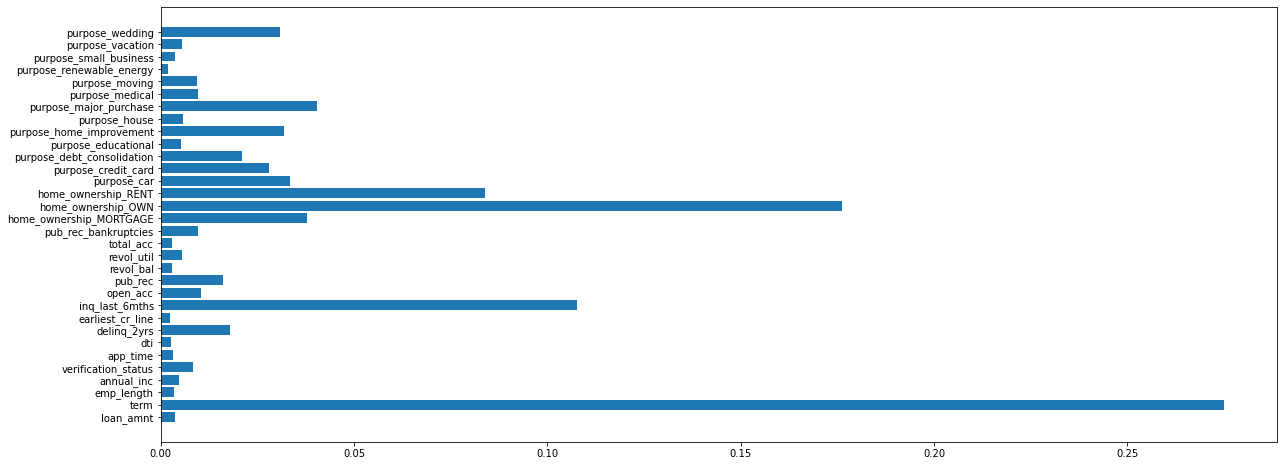

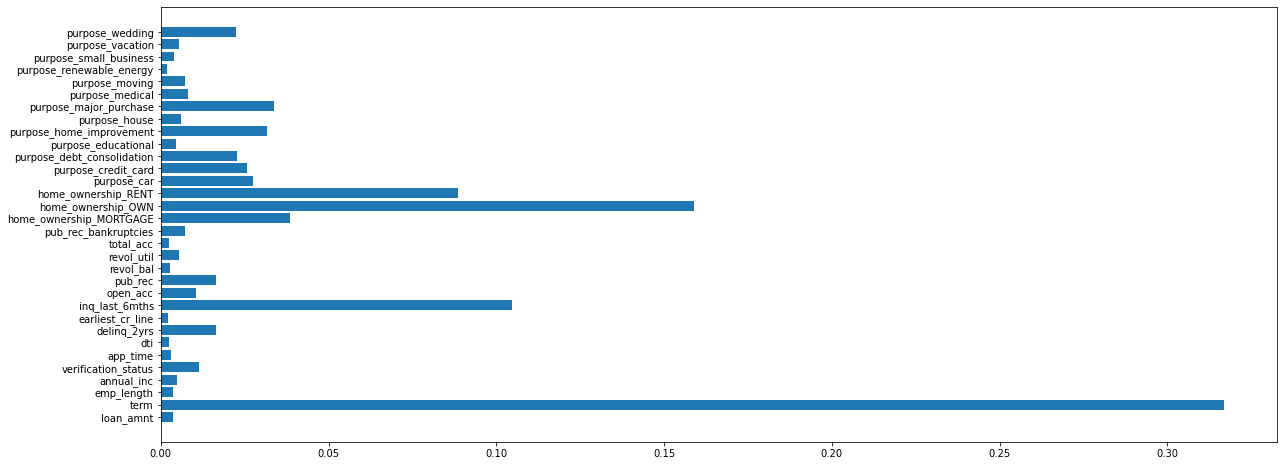

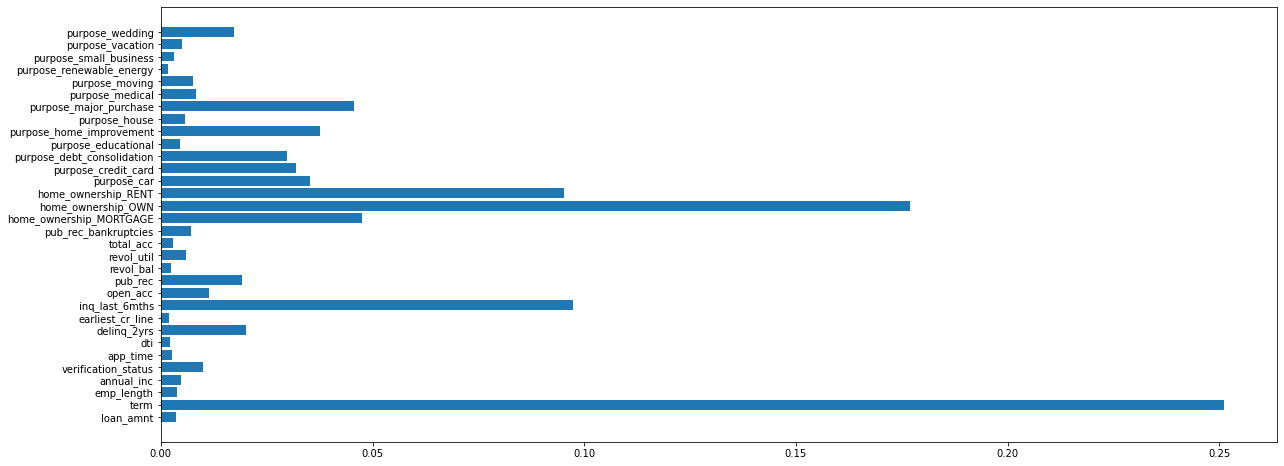

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
for idx, cv_score in enumerate(cv_scores,1):
  plt.figure(idx, figsize=(20, 8))
  plt.barh(X_test.columns, cv_score.best_estimator_.feature_importances_)